All strategies and profits:
       D0  D1  D2  D3  D4  D5  D6  D7  C0  C1  C2  S0  S1  S2  R  R_p  Profit
0       0   0   0   0   0   0   0   0   0   0   0   0   0   0  0    0    88.0
1       0   0   0   0   0   0   0   0   0   0   0   0   0   0  0    1    73.0
2       0   0   0   0   0   0   0   0   0   0   0   0   0   0  1    0    87.4
3       0   0   0   0   0   0   0   0   0   0   0   0   0   0  1    1    72.4
4       0   0   0   0   0   0   0   0   0   0   0   0   0   1  0    0    86.0
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  .. ..  ...     ...
65531   1   1   1   1   1   1   1   1   1   1   1   1   1   0  1    1    57.4
65532   1   1   1   1   1   1   1   1   1   1   1   1   1   1  0    0    71.0
65533   1   1   1   1   1   1   1   1   1   1   1   1   1   1  0    1    56.0
65534   1   1   1   1   1   1   1   1   1   1   1   1   1   1  1    0    70.4
65535   1   1   1   1   1   1   1   1   1   1   1   1   1   1  1    1    55.4

[65536 rows x 17 columns]

Top 10 s

C:\Users\Aroll\AppData\Local\Temp\ipykernel_10540\4269309337.py:107: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
E:\IDE\conda\envs\math\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


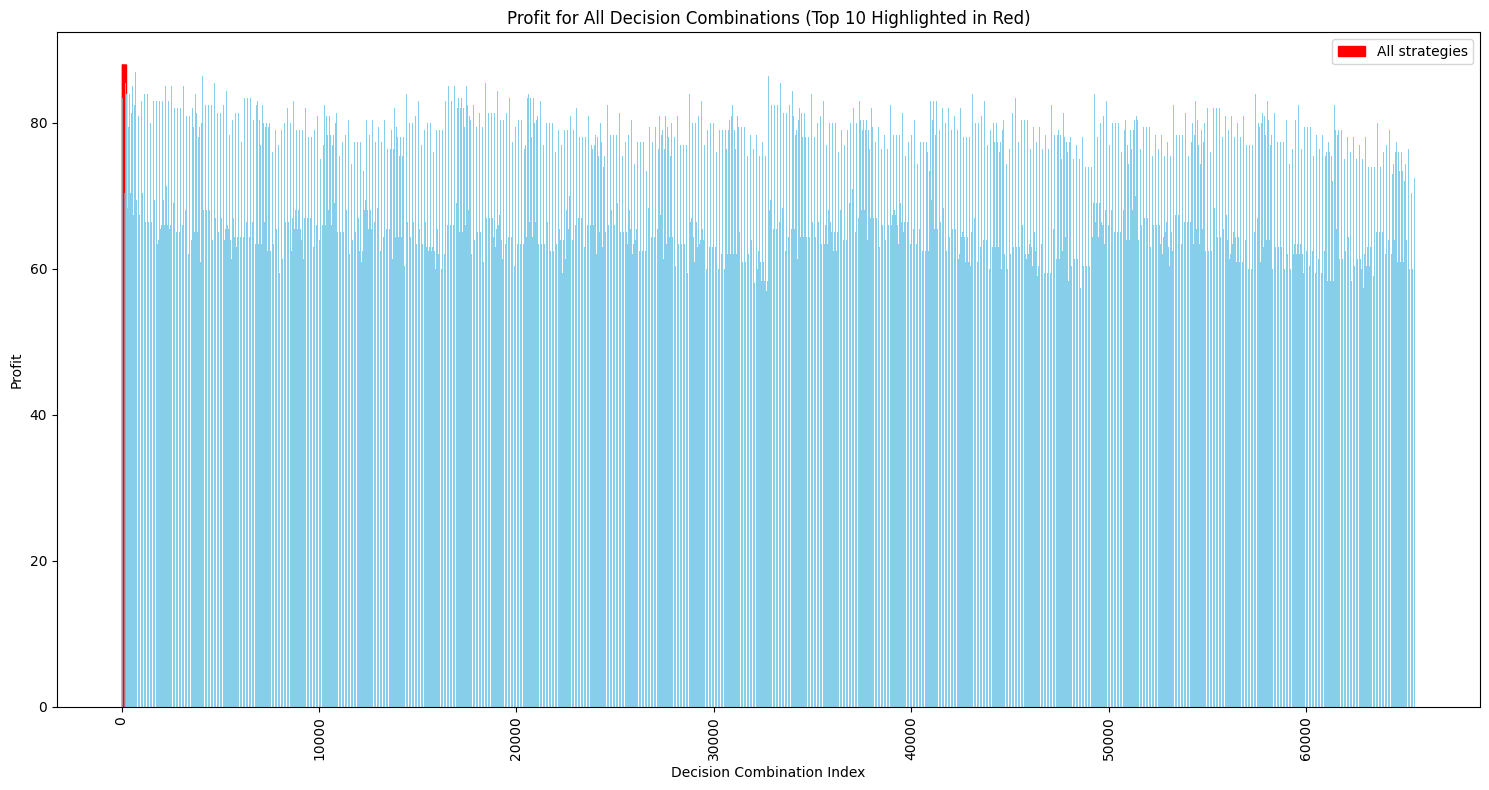

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd

# 参数设定
params = {
    'm': 8,  # 零配件数量
    'n': 3,  # 半成品数量
    'p': [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10],  # 零配件次品率
    'c': [2, 8, 12, 2, 8, 12, 8, 12],  # 购买单价
    'd': [1, 1, 2, 1, 1, 2, 1, 2],  # 检测成本
    'a': [8, 8, 8],  # 装配成本
    'af': 0.10,  # 半成品次品率
    'pf': 0.10,  # 成品次品率
    's': 200,  # 市场售价
    'l': 40,  # 调换损失
    'ar': 10,  # 半成品拆解费用
    'r': 6,    # 拆解费用
    'rp': 15   # 正品拆解费用
}

# 决策变量
decisions = [0, 1]

# 利润计算函数
def calculate_profit(D, C, S, R, R_prime, params):
    # 零配件成本
    cost_parts = sum(params['c'][i] + params['d'][i] * D[i] for i in range(params['m']))
    
    # 半成品成本，包含装配成本和拆解成本
    cost_subassemblies = 0
    for j in range(params['n']):
        if S[j] == 1:  # 如果半成品被拆解
            cost_subassemblies += params['ar']  # 加入拆解费用
        else:
            # 如果检测成本不足，则假定为0
            detection_cost = params['d'][params['m'] + j] if params['m'] + j < len(params['d']) else 0
            cost_subassemblies += params['a'][j] + detection_cost * C[j]  # 正常装配费用
    
    # 销售收入和次品损失
    revenue = params['s'] * (1 - params['pf'])
    cost_rework = params['r'] * R * params['pf']
    loss_replacement = params['l'] * params['pf']
    
    # 正品拆解成本
    cost_product_disassembly = params['rp'] if R_prime == 1 else 0
    
    # 总利润
    profit = revenue - cost_parts - cost_subassemblies - cost_rework - loss_replacement - cost_product_disassembly
    return profit

# 遍历所有可能的决策组合
profits = []
decision_combinations = list(itertools.product(decisions, repeat=params['m'] + params['n'] + params['n'] + 2))  # 增加正品拆解决策维度

# 计算每种组合的利润
for combo in decision_combinations:
    D = combo[:params['m']]
    C = combo[params['m']:params['m'] + params['n']]
    S = combo[params['m'] + params['n']:params['m'] + params['n']*2]  # 拆解决策
    R = combo[-2]  # 次品拆解决策
    R_prime = combo[-1]  # 正品拆解决策
    profit = calculate_profit(D, C, S, R, R_prime, params)
    profits.append((combo, profit))

# 将组合和利润转换为DataFrame
columns = [f'D{i}' for i in range(params['m'])] + [f'C{j}' for j in range(params['n'])] + [f'S{j}' for j in range(params['n'])] + ['R', 'R_p']
df = pd.DataFrame([combo for combo, profit in profits], columns=columns)
df['Profit'] = [profit for combo, profit in profits]

# 打印所有策略
print("All strategies and profits:")
print(df)

# 按利润排序，选出前10种策略
top_10_strategies = df.sort_values(by='Profit', ascending=False).head(10)

# 打印前10种策略
print("\nTop 10 strategies by profit:")
print(top_10_strategies)

# 可视化全部策略，红色突出前10种策略
plt.figure(figsize=(15, 8))

# 所有策略的索引
all_indices = df.index

# 前10种策略的索引
top_10_indices = top_10_strategies.index

# 条形图：显示所有策略
barlist = plt.bar(all_indices, df['Profit'], color='skyblue', label='All strategies')

# 突出前10策略，标记为红色
for i in top_10_indices:
    barlist[i].set_color('red')

# 设置标签和标题
plt.xlabel('Decision Combination Index')
plt.ylabel('Profit')
plt.title('Profit for All Decision Combinations (Top 10 Highlighted in Red)')
plt.xticks(rotation=90)
plt.legend()

# 展示图形
plt.tight_layout()
plt.show()


